In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("/content/gdrive/My Drive/hankuk/mHealth_subject1.csv", header=None)

In [5]:
for i in range(2,9):
  df2 = pd.read_csv("/content/gdrive/My Drive/hankuk/mHealth_subject" + str(i) +".csv", header=None)
  df.append(df2)

In [6]:
dataset = df.values

In [7]:
y_ohe = df[21]

In [8]:
y_ohe = pd.get_dummies(y_ohe)

In [10]:
Y = y_ohe.values

In [12]:
X = dataset[:, 0:21]
Y = Y[:,:]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [16]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(101176, 21) (21681, 21) (21681, 21) (101176, 7) (21681, 7) (21681, 7)


In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model = Sequential([    
                    Dense(32, activation='relu', input_shape=(21,)),    
                    Dense(32, activation='relu'), 
                    Dense(64, activation='relu'), 
                    Dense(32, activation='relu'),       
                    Dense(7, activation='softmax'),])
model.compile(optimizer='sgd',              
              loss='binary_crossentropy',              
              metrics=['accuracy', f1_m, precision_m, recall_m])

In [19]:
hist = model.fit(X_train, Y_train,          
                 batch_size=32, epochs=100,          
                 validation_data=(X_val, Y_val))

Epoch 1/100
3162/3162 [==============================] - 4s 1ms/step - loss: 0.1404 - accuracy: 0.8762 - f1_m: 0.8655 - precision_m: 0.8847 - recall_m: 0.8500 - val_loss: 0.0954 - val_accuracy: 0.8848 - val_f1_m: 0.8874 - val_precision_m: 0.9049 - val_recall_m: 0.8710
Epoch 2/100
3162/3162 [==============================] - 4s 1ms/step - loss: 0.0822 - accuracy: 0.8991 - f1_m: 0.8973 - precision_m: 0.9134 - recall_m: 0.8822 - val_loss: 0.0811 - val_accuracy: 0.9025 - val_f1_m: 0.8964 - val_precision_m: 0.9127 - val_recall_m: 0.8811
Epoch 3/100
3162/3162 [==============================] - 4s 1ms/step - loss: 0.0701 - accuracy: 0.9111 - f1_m: 0.9087 - precision_m: 0.9160 - recall_m: 0.9017 - val_loss: 0.0690 - val_accuracy: 0.9092 - val_f1_m: 0.9084 - val_precision_m: 0.9132 - val_recall_m: 0.9037
Epoch 4/100
3162/3162 [==============================] - 5s 1ms/step - loss: 0.0642 - accuracy: 0.9128 - f1_m: 0.9124 - precision_m: 0.9161 - recall_m: 0.9088 - val_loss: 0.0639 - val_accuracy:

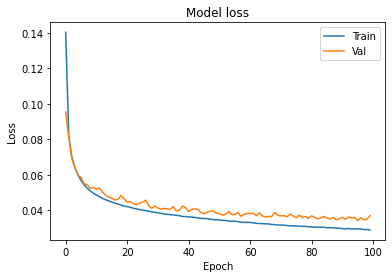

In [21]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

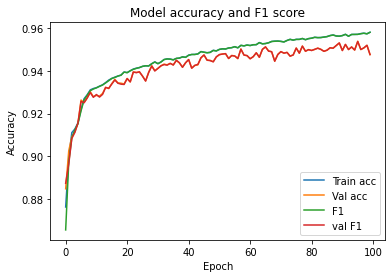

In [23]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['f1_m'])
plt.plot(hist.history['val_f1_m'])
plt.title('Model accuracy and F1 score')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train acc', 'Val acc', 'F1', 'val F1'], loc='lower right')
plt.show()